Nicholas Sugijono


Link Video : https://drive.google.com/file/d/1pWOMhiCz6Vp_1AufIvzpp4jqXEqqlzlD/view?usp=sharing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Importing Dataset

In [2]:
df=pd.read_csv('Bank_Loan_Granting.csv')

## A. Identifikasi problem dari data

In [3]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1/60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1/50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1/00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2/70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1/00,2,0,0,0,0,0,1


In [4]:
df.shape

(5000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  5000 non-null   int64 
 1   Age                 5000 non-null   int64 
 2   Experience          5000 non-null   int64 
 3   Income              5000 non-null   int64 
 4   ZIP Code            5000 non-null   int64 
 5   Family              5000 non-null   int64 
 6   CCAvg               5000 non-null   object
 7   Education           5000 non-null   int64 
 8   Mortgage            5000 non-null   int64 
 9   Personal Loan       5000 non-null   int64 
 10  Securities Account  5000 non-null   int64 
 11  CD Account          5000 non-null   int64 
 12  Online              5000 non-null   int64 
 13  CreditCard          5000 non-null   int64 
dtypes: int64(13), object(1)
memory usage: 547.0+ KB



Dari informasi di atas, saya dapat mengidentifikasi bahwa CCAvg memiliki tipe data objek. Ini menunjukkan bahwa dalam dataset, kolom CCAvg memiliki tipe data yang tidak sesuai, yaitu objek dimana seharusnya float.

In [6]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

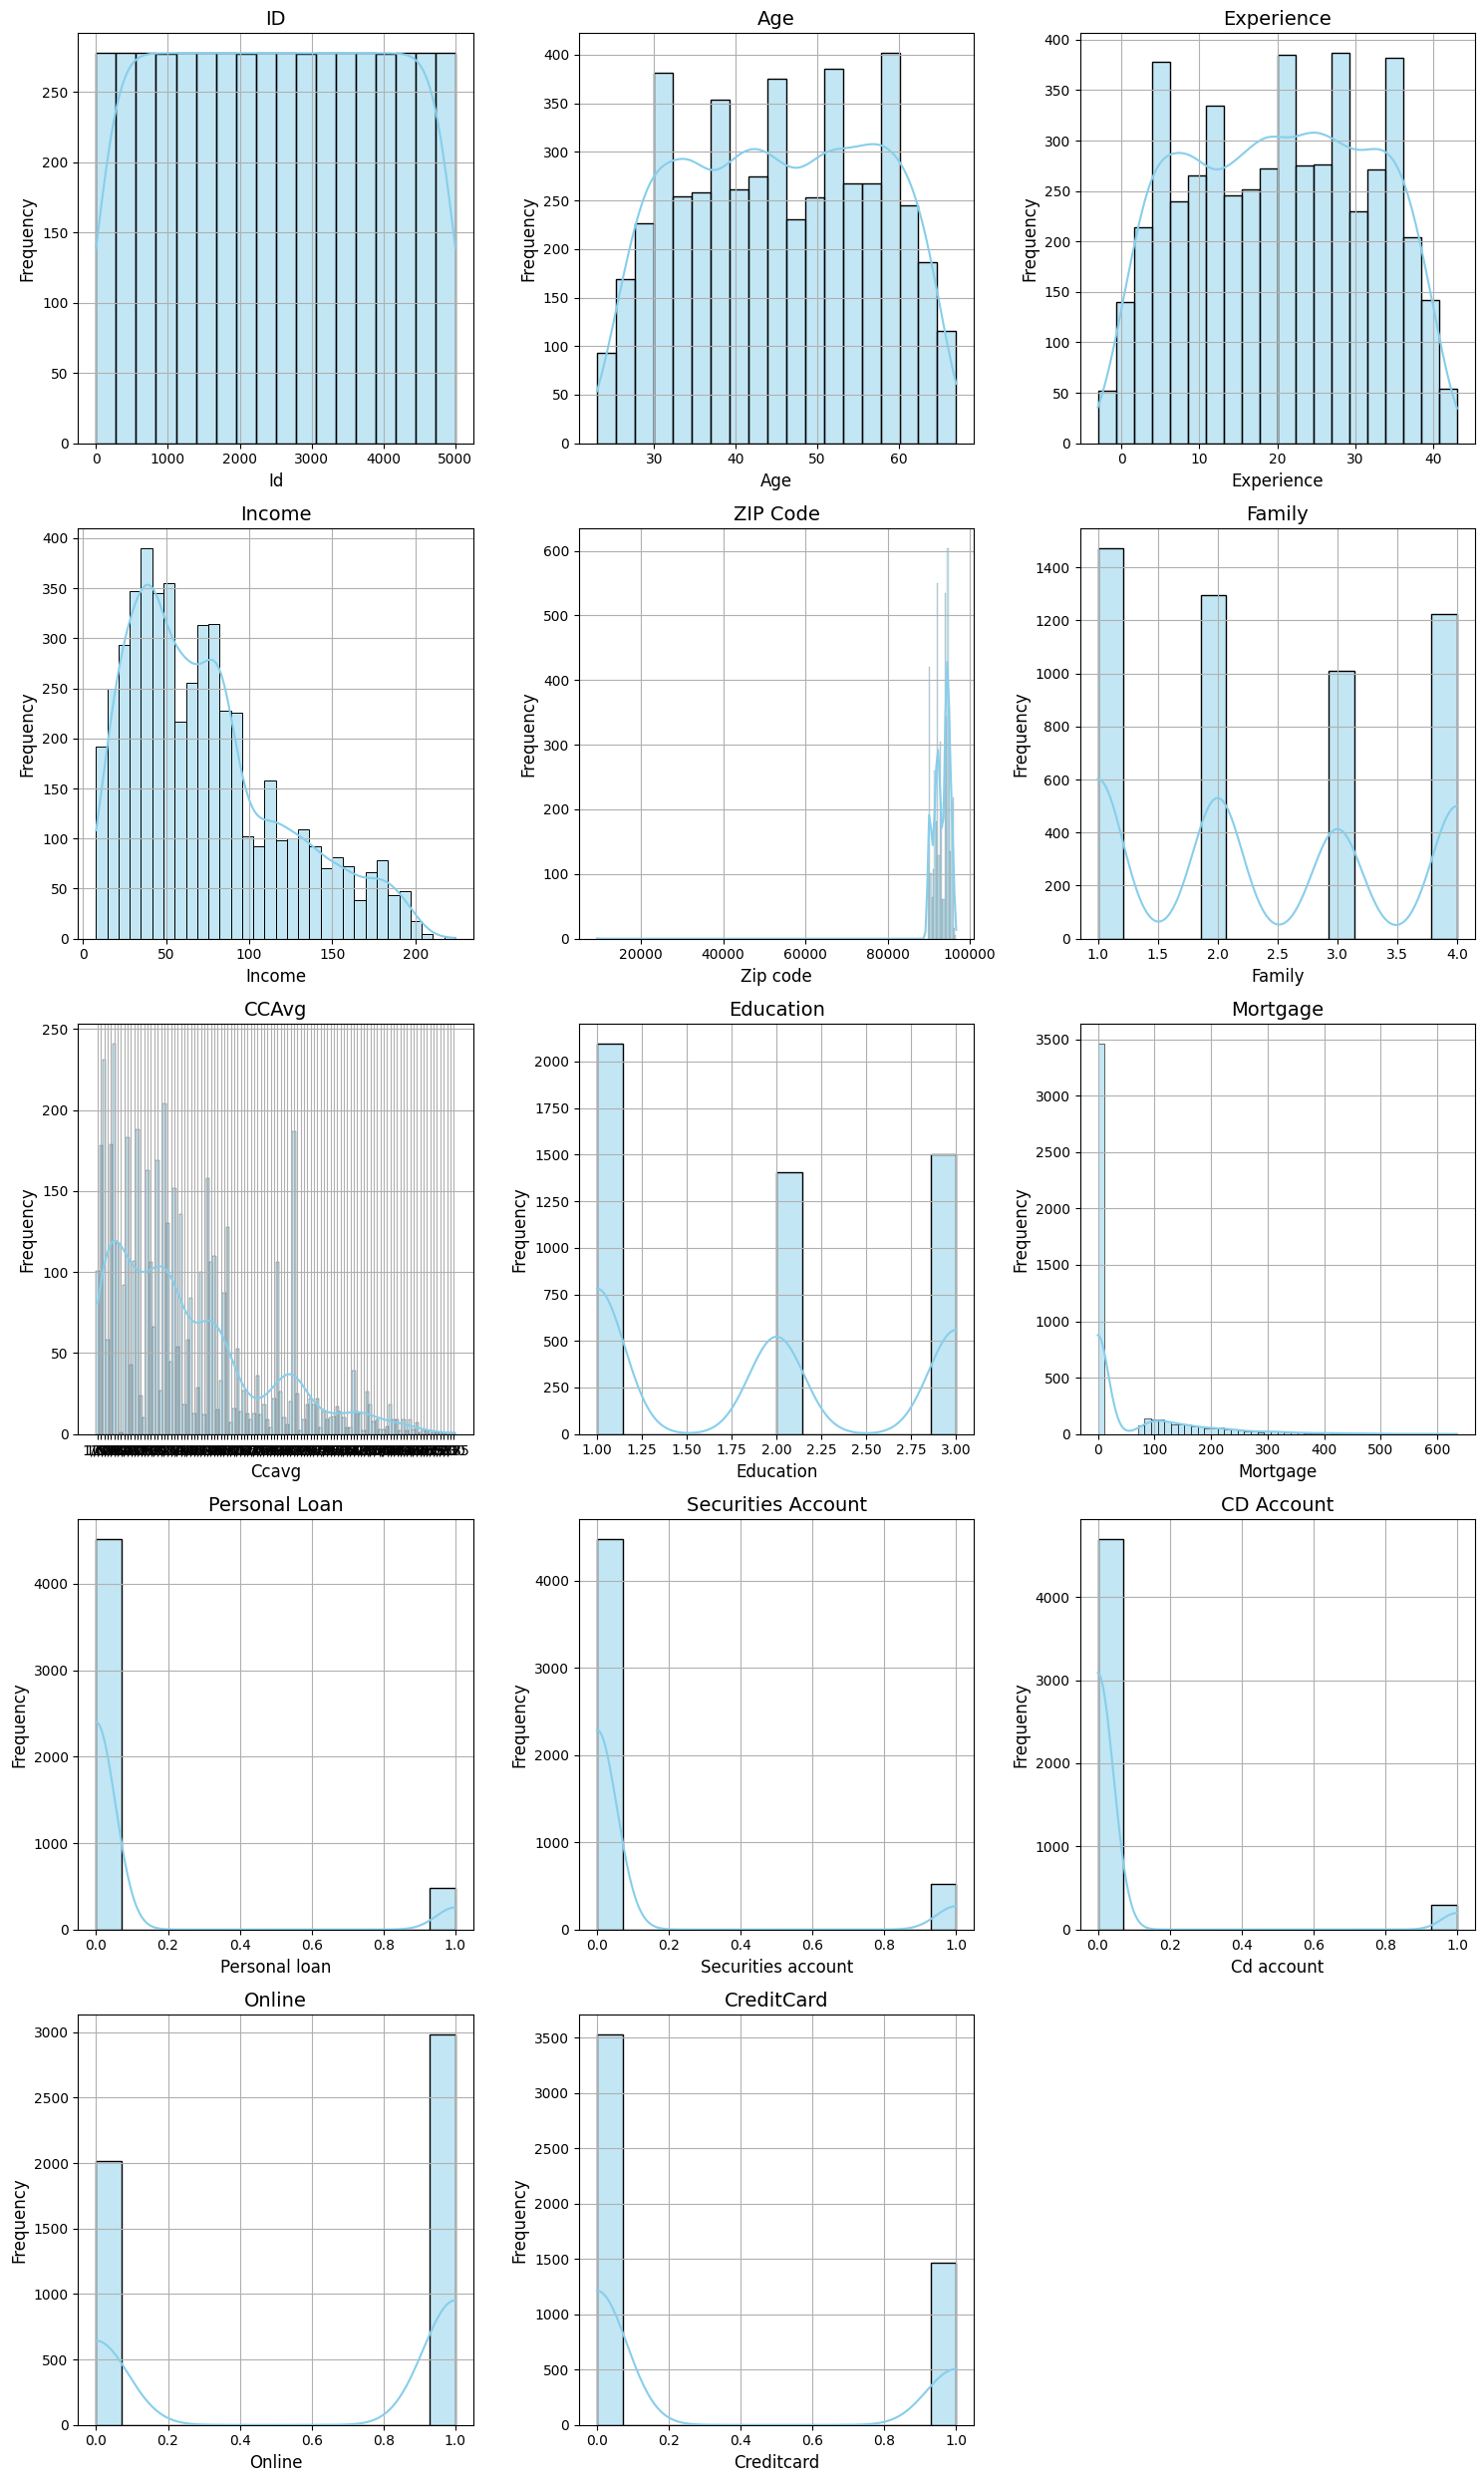

In [7]:
num_cols = len(df.columns)

num_rows = (num_cols + 2) // 3

fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows * 5))

axes = axes.flatten()

for i, column in enumerate(df.columns):
    sns.histplot(data=df, x=column, ax=axes[i], kde=True, color='skyblue')
    axes[i].set_title(column, fontsize=14)
    axes[i].set_xlabel(column.capitalize(), fontsize=12)
    axes[i].set_ylabel('Frequency', fontsize=12)
    axes[i].grid(True)

for j in range(num_cols, num_rows * 3):
    fig.delaxes(axes[j])

plt.tight_layout()

plt.show()


Dari histogram di atas, saya bisa mengidentifikasi bahwa Experience memiliki value negatif. Ini menunjukkan bahwa dalam dataset, terdapat nilai negatif dalam kolom Experience, yang seharusnya tidak masuk akal.

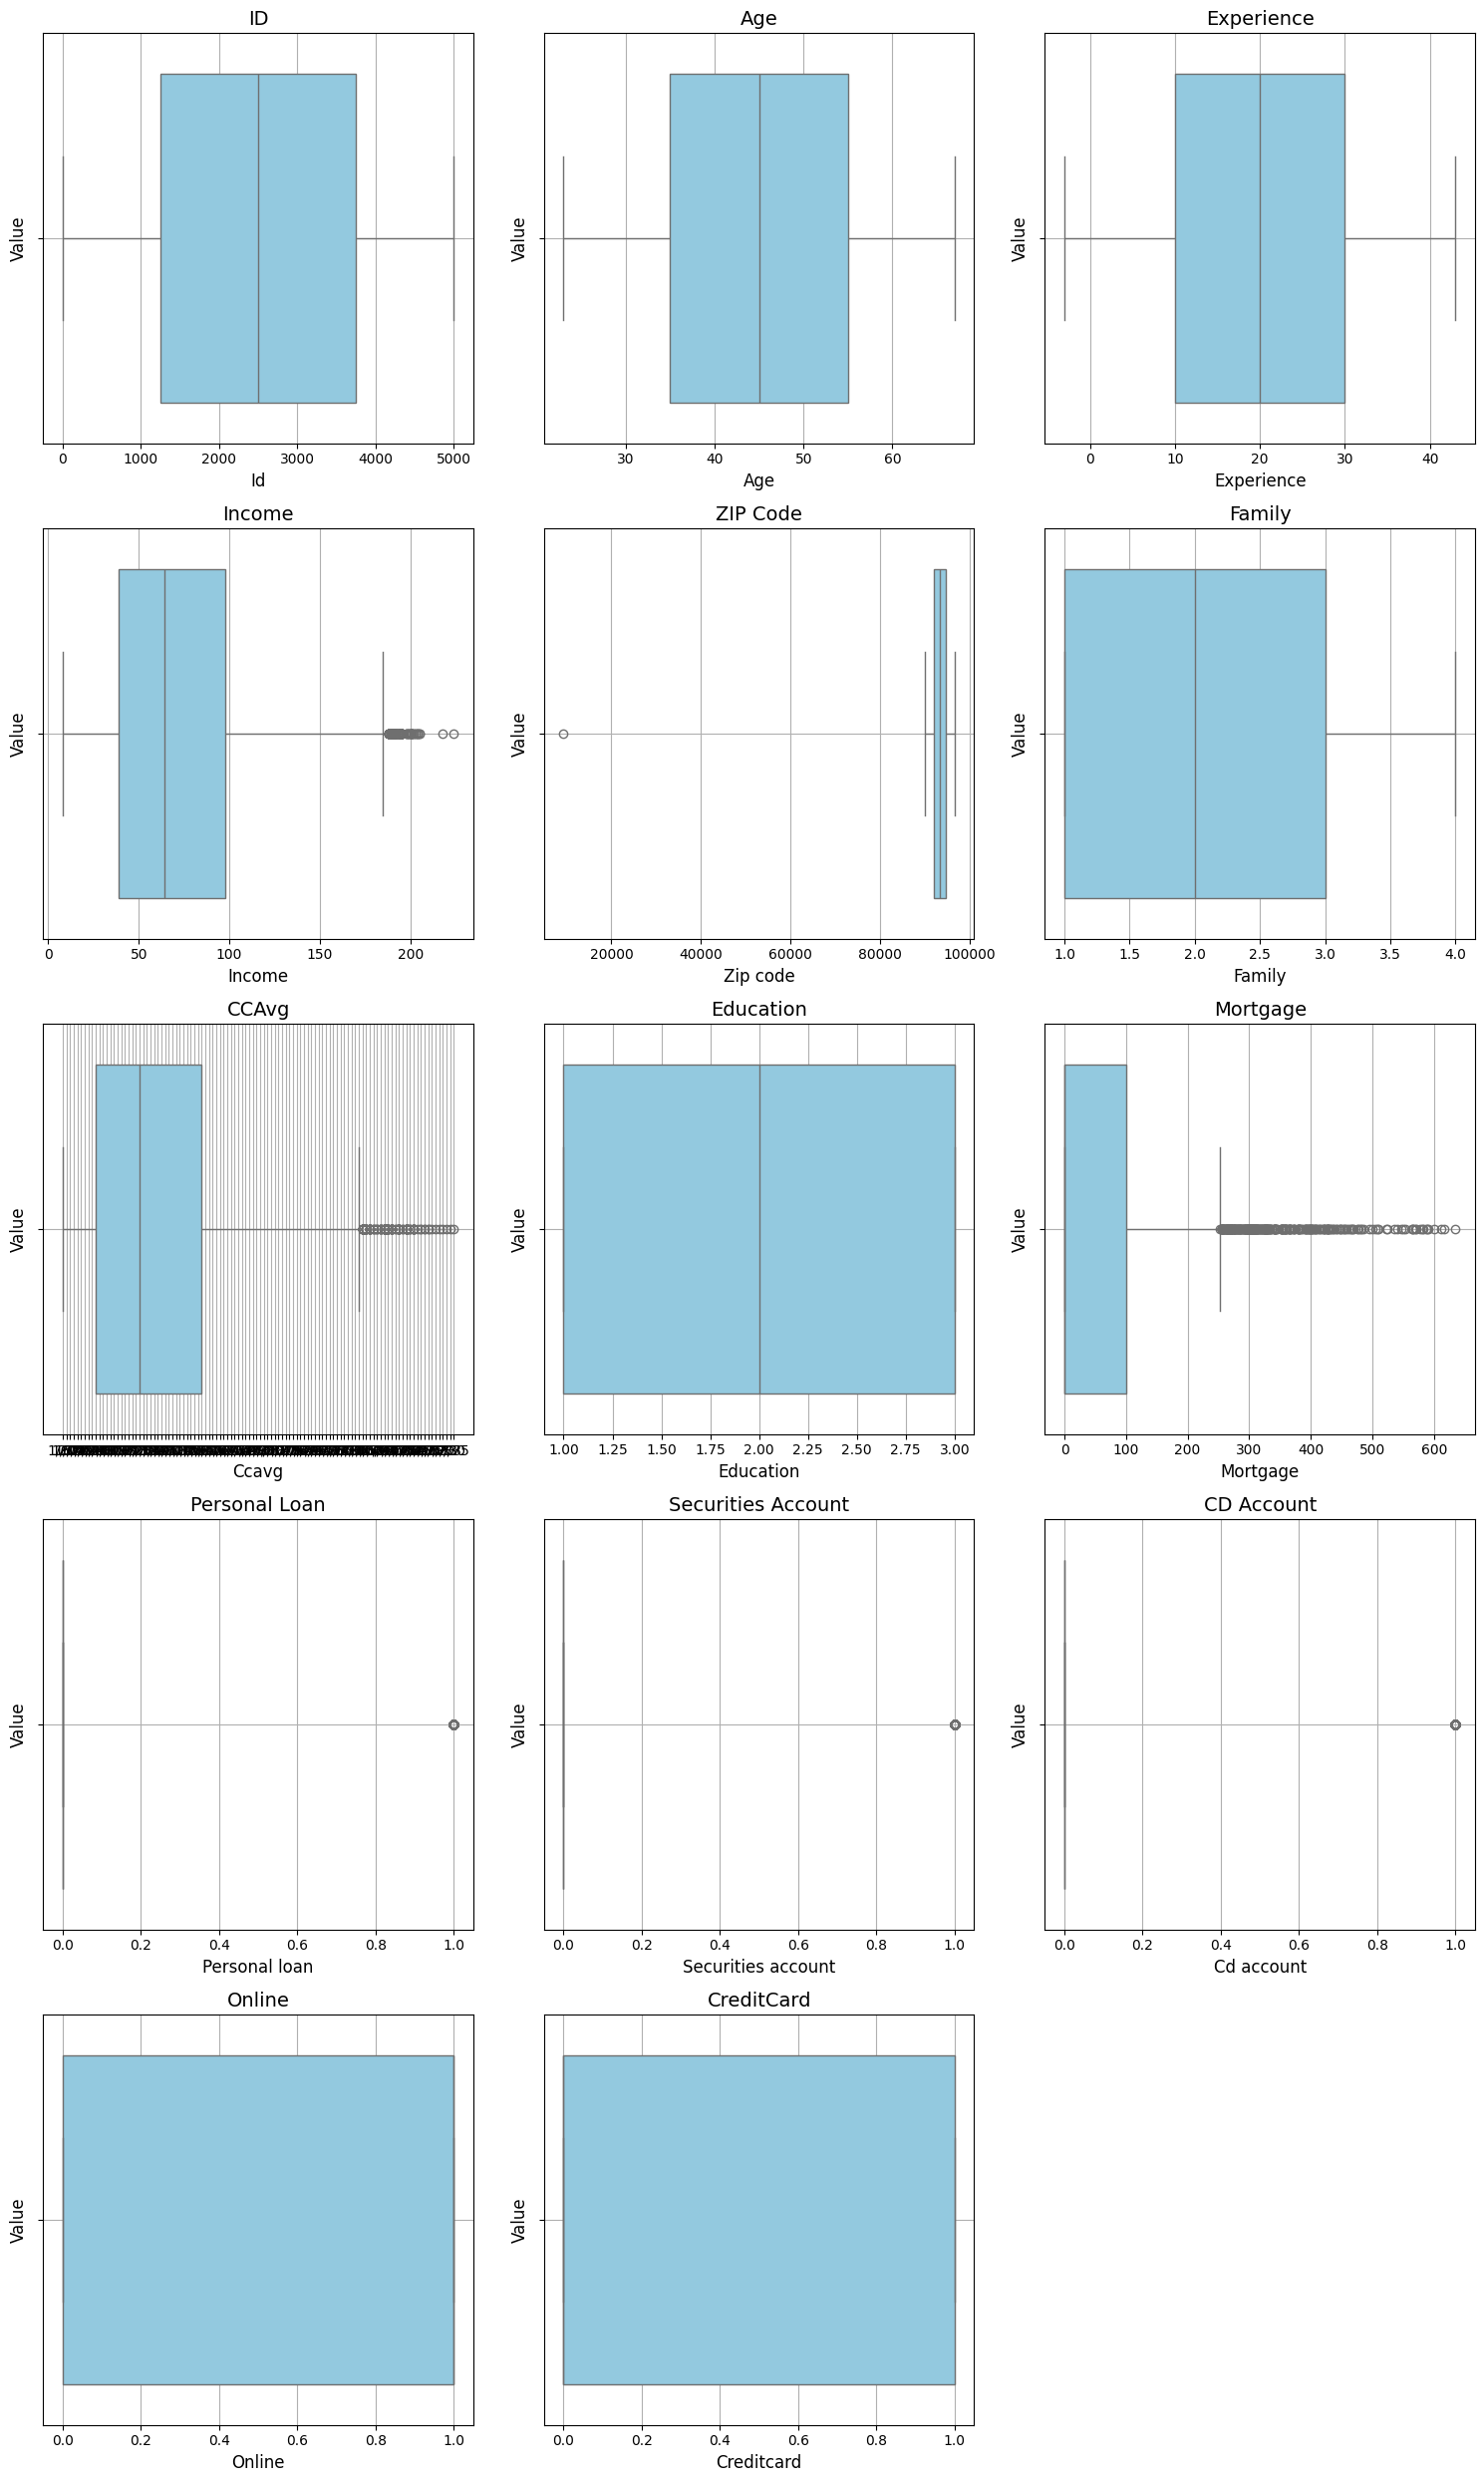

In [8]:

num_cols = len(df.columns)

num_rows = (num_cols + 2) // 3

fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows * 5))

axes = axes.flatten()

for i, column in enumerate(df.columns):
    sns.boxplot(data=df, x=column, ax=axes[i], color='skyblue')
    axes[i].set_title(column, fontsize=14)
    axes[i].set_xlabel(column.capitalize(), fontsize=12)
    axes[i].set_ylabel('Value', fontsize=12)
    axes[i].grid(True)

for j in range(num_cols, num_rows * 3):
    fig.delaxes(axes[j])

plt.tight_layout()

plt.show()



Dari eksplorasi data di atas, saya menemukan beberapa masalah dalam dataset yang ada, yaitu:
- **CCAvg**: Variabel ini seharusnya bertipe float, namun dalam dataset, tipe datanya adalah objek.
- **Experience**: Terdapat data kotor, di mana terdapat nilai negatif (-) pada kolom Experience, yang tidak masuk akal.
- **Outliers**: Banyak nilai yang dikategorikan sebagai outliers dalam boxplot di atas, menunjukkan adanya anomali atau data yang ekstrem dalam dataset.

In [10]:
df['CCAvg'] = df['CCAvg'].astype(str).replace('/', '.', regex=True).astype(float)


Untuk problem CCAvg, saya replace tanda '/' menjadi '.' yang akan menjadikan value dalam bentuk decimal, dan mengubah typenya menjadi float.

In [13]:
df['Experience'] = df['Experience'].abs()

Untuk problem Experience, saya menjadikan semua value dari kolom Experience jadi absolute, yaitu mengubah semua value - menjadi +

In [9]:
df['ZIP Code'].value_counts()

ZIP Code
94720    169
94305    127
95616    116
90095     71
93106     57
        ... 
96145      1
94087      1
91024      1
9307       1
94598      1
Name: count, Length: 467, dtype: int64

In [12]:
df = df.drop(columns=['ID'], axis = 1)

Saya memilih untuk melakukan dropping kepada kolom ID dikarenakan digunakan hanya sebagai indexing, bukan sebuah variable independen.

In [14]:
df_input = df.drop(columns=['Personal Loan'], axis = 1)
df_output = df['Personal Loan']

In [15]:
df_input.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,1


In [16]:
df_output.head()

0    0
1    0
2    0
3    0
4    0
Name: Personal Loan, dtype: int64

In [17]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

df_input = scaler.fit_transform(df_input)


## B. Train Test Validation Splitting

In [18]:
from sklearn.model_selection import train_test_split

df_size = len(df)

x_train, x_test, y_train, y_test = train_test_split(df_input, df_output, test_size=0.1, random_state=42, stratify=df_output)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=(0.1*df_size/len(x_train)), random_state=42, stratify=y_train)

print(x_train.shape, x_test.shape, x_val.shape)

(4000, 12) (500, 12) (500, 12)


## C. Tantangan dan Kesulitan dari data

terdapat beberapa masalah dan tantangan yang perlu diatasi dalam dataset:

##### 1. Kualitas Data:
- **Kolom CCAvg yang kotor**: Kolom CCAvg (Average Credit Card Spending per Month) seharusnya berisi nilai numerik, tetapi beberapa entri disimpan dalam tipe data objek yang tidak sesuai dengan deskripsi kolom. Ini mungkin disebabkan oleh adanya nilai yang hilang atau entri yang tidak sesuai format. Data kotor seperti ini perlu dibersihkan agar sesuai dengan tipe data yang diharapkan.
- **Kolom Experience dengan nilai negatif**: Kolom Experience (lama pengalaman) memiliki nilai negatif yang tidak masuk akal. Pengalaman tidak dapat memiliki nilai negatif, oleh karena itu nilai-nilai ini perlu diperiksa dan diatasi.

##### 2. Jenis Data:
- **Skala Data yang Tersebar**: Dataset memiliki skala yang cukup tersebar di antara fitur-fiturnya. Oleh karena itu, perlu dilakukan penskalaan fitur agar semua fitur memiliki skala yang seragam.

##### 3. Ketidakseimbangan Kelas:
- **Ketidakseimbangan Kelas pada Target Variable**: Variabel target (Personal loan) memiliki bias terhadap kelas "tidak churn" (churn = 0). Hal ini menunjukkan ketidakseimbangan dalam dataset, yang dapat menyebabkan model cenderung memprediksi mayoritas kelas dan mengabaikan kelas minoritas. Untuk menangani masalah ini, perlu dilakukan teknik seperti oversampling atau undersampling, atau menggunakan algoritma khusus seperti algoritma klasifikasi yang sensitif terhadap kelas.

## D. Arsitektur Baseline

In [19]:
import keras
import keras.losses
import keras.metrics
import keras.layers
import keras.optimizers
import tensorflow as tf

model = keras.models.Sequential()
model.add(tf.keras.Input(shape=(12,)))
model.add(keras.layers.Dense(24, activation='relu'))
model.add(keras.layers.Dense(24, activation='relu'))
model.add(keras.layers.Dense(2, activation='linear'))
model.compile(loss=keras.losses.SparseCategoricalCrossentropy())
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 24)             │           312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 24)             │           600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            50 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 962 (3.76 KB)

 Trainable params: 962 (3.76 KB)

 Non-trainable params: 0 (0.00 B)

None


In [20]:
learn = model.fit(x_train, y_train, epochs = 100, verbose = 2, validation_data=(x_val, y_val))

Epoch 1/100
125/125 - 1s - 6ms/step - loss: 0.7963 - val_loss: 0.6627
Epoch 2/100
125/125 - 0s - 1ms/step - loss: 0.7141 - val_loss: 0.6918
Epoch 3/100
125/125 - 0s - 974us/step - loss: 0.6909 - val_loss: 0.6918
Epoch 4/100
125/125 - 0s - 1ms/step - loss: 0.6907 - val_loss: 0.6896
Epoch 5/100
125/125 - 0s - 1ms/step - loss: 0.6902 - val_loss: 0.6896
Epoch 6/100
125/125 - 0s - 1ms/step - loss: 0.6902 - val_loss: 0.6896
Epoch 7/100
125/125 - 0s - 1ms/step - loss: 0.6892 - val_loss: 0.6856
Epoch 8/100
125/125 - 0s - 1ms/step - loss: 0.6826 - val_loss: 0.6842
Epoch 9/100
125/125 - 0s - 1ms/step - loss: 0.6741 - val_loss: 0.6604
Epoch 10/100
125/125 - 0s - 1ms/step - loss: 0.6581 - val_loss: 0.6523
Epoch 11/100
125/125 - 0s - 1ms/step - loss: 0.6367 - val_loss: 0.5621
Epoch 12/100
125/125 - 0s - 1ms/step - loss: 0.6163 - val_loss: 0.6041
Epoch 13/100
125/125 - 0s - 1ms/step - loss: 0.5657 - val_loss: 0.5218
Epoch 14/100
125/125 - 0s - 1ms/step - loss: 0.5515 - val_loss: 0.5407
Epoch 15/100


In [21]:
train_result = model.predict(x_train)
test_result = model.predict(x_test)
test_result = np.argmax(test_result, axis=1)
test_result

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

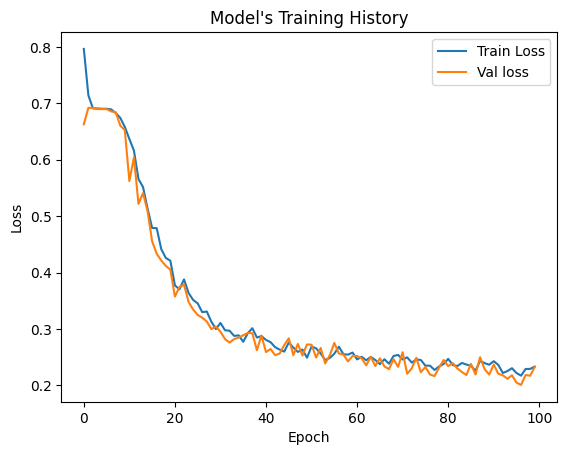

In [22]:
import matplotlib.pyplot as plt

train_loss = learn.history['loss']
val_loss = learn.history['val_loss']

plt.plot(train_loss, label = 'Train Loss')
plt.plot(val_loss, label = 'Val loss')
plt.title('Model\'s Training History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

0.7125737463126843


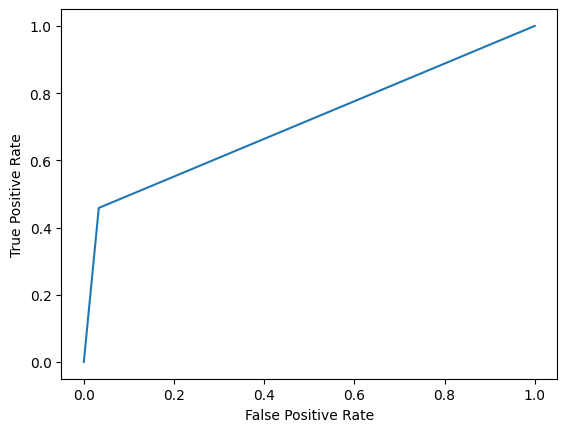

In [23]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, test_result)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print(roc_auc_score(y_test, test_result))
plt.show()

In [24]:
from sklearn.metrics import classification_report


print(classification_report(y_test, test_result))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       452
           1       0.59      0.46      0.52        48

    accuracy                           0.92       500
   macro avg       0.77      0.71      0.74       500
weighted avg       0.91      0.92      0.91       500



Dari classification report ini, kita bisa mendapatkan informasi bahwa model ini, meskipun sudah bisa memprediksi target variable '0' dengan akurat, dengan precision sebesar 0.94, recall sebesar 0.97, dan F-1 Score sebesar 0.96, model ini masih belum bisa memprediksi target variable '1' dengan baik. Precision untuk kelas '1' hanya sebesar 0.59, recall sebesar 0.46, dan F-1 Score sebesar 0.52. Hal ini menunjukkan bahwa model masih belum optimal dalam memprediksi kelas '1'. Oleh karena itu, meskipun model memiliki performa yang baik untuk kelas '0', secara keseluruhan model masih belum bisa dikatakan baik karena belum mampu memprediksi kedua kelas dengan baik.

## E. Modifikasi Arsitektur

In [25]:
import keras
import keras.losses
import keras.metrics
import keras.layers
import keras.optimizers
import tensorflow as tf

model = keras.models.Sequential()
model.add(tf.keras.Input(shape=(12,)))
model.add(keras.layers.Dense(24, activation='relu'))
model.add(keras.layers.Dense(24, activation='relu'))
model.add(keras.layers.Dense(2, activation='sigmoid'))
model.compile(optimizer=keras.optimizers.SGD(), loss=keras.losses.SparseCategoricalCrossentropy(), metrics=[keras.metrics.SparseCategoricalAccuracy()])
print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 24)             │           312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 24)             │           600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │            50 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 962 (3.76 KB)

 Trainable params: 962 (3.76 KB)

 Non-trainable params: 0 (0.00 B)

None


Dalam arsitektur model baru ini, saya melakukan dua perubahan untuk meningkatkan kesederhanaan (simplicity) dan efisiensi (efficiency) dari model:

1. **Activation Function di Output Layer**:
   Saya mengubah activation function di output layer terakhir menjadi sigmoid. Activation function sigmoid sangat cocok untuk kasus ini karena target variable merupakan binary (0 atau 1). Dengan menggunakan sigmoid, model akan mengeluarkan prediksi dalam rentang 0 hingga 1, yang dapat diinterpretasikan sebagai probabilitas bahwa sampel tersebut termasuk dalam kelas positif (1). Ini membantu model untuk lebih baik memprediksi target variable dengan memberikan nilai probabilitas untuk setiap kelas.

2. **Optimizer**:
   Saya mengubah optimizer menjadi Stochastic Gradient Descent (SGD). Model yang lebih sederhana seperti yang kita gunakan tidak memerlukan banyak tenaga komputasional. Dengan menggunakan SGD, kita dapat memperoleh hasil dengan lebih cepat daripada optimizers yang lebih kompleks. SGD bekerja dengan menghitung gradien dari fungsi loss pada setiap batch data dan melakukan pembaruan parameter model secara iteratif, sehingga cocok digunakan dalam kasus-kasus di mana kita ingin mencapai hasil yang cukup baik dengan biaya komputasi yang lebih rendah.


In [26]:
learn = model.fit(x_train, y_train, epochs = 100, verbose = 2, validation_data=(x_val, y_val))

Epoch 1/100
125/125 - 0s - 3ms/step - loss: 0.4475 - sparse_categorical_accuracy: 0.8960 - val_loss: 0.3605 - val_sparse_categorical_accuracy: 0.9040
Epoch 2/100
125/125 - 0s - 934us/step - loss: 0.3362 - sparse_categorical_accuracy: 0.9040 - val_loss: 0.2919 - val_sparse_categorical_accuracy: 0.9040
Epoch 3/100
125/125 - 0s - 1ms/step - loss: 0.2896 - sparse_categorical_accuracy: 0.9040 - val_loss: 0.2541 - val_sparse_categorical_accuracy: 0.9040
Epoch 4/100
125/125 - 0s - 1ms/step - loss: 0.2610 - sparse_categorical_accuracy: 0.9040 - val_loss: 0.2291 - val_sparse_categorical_accuracy: 0.9040
Epoch 5/100
125/125 - 0s - 1ms/step - loss: 0.2416 - sparse_categorical_accuracy: 0.9040 - val_loss: 0.2123 - val_sparse_categorical_accuracy: 0.9040
Epoch 6/100
125/125 - 0s - 1ms/step - loss: 0.2270 - sparse_categorical_accuracy: 0.9043 - val_loss: 0.1993 - val_sparse_categorical_accuracy: 0.9060
Epoch 7/100
125/125 - 0s - 1ms/step - loss: 0.2152 - sparse_categorical_accuracy: 0.9055 - val_los

In [27]:
train_result = model.predict(x_train)
test_result = model.predict(x_test)
test_result = np.argmax(test_result, axis=1)
test_result

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 578us/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

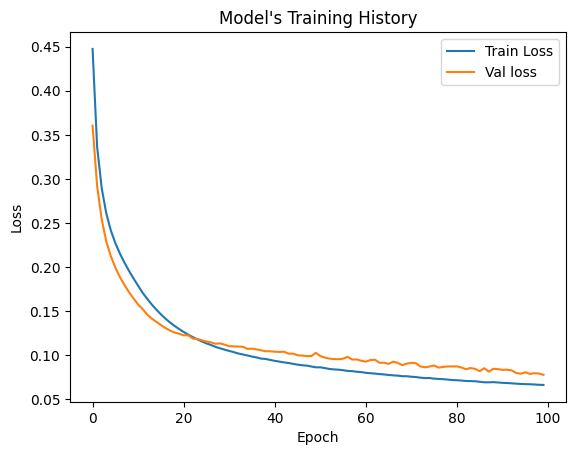

In [28]:
import matplotlib.pyplot as plt

train_loss = learn.history['loss']
val_loss = learn.history['val_loss']

plt.plot(train_loss, label = 'Train Loss')
plt.plot(val_loss, label = 'Val loss')
plt.title('Model\'s Training History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Dari grafik ini, kita dapat melihat bahwa jarak antara Train Loss dan Validation Loss sangat kecil dan mendekati 0 untuk setiap epoch-nya. Hal ini menunjukkan bahwa model memiliki kinerja yang konsisten dan tidak mengalami overfitting atau underfitting.

1. **Jarak yang Kecil**:
   - Jarak yang kecil antara Train Loss dan Validation Loss menunjukkan bahwa model tidak terlalu "mengingat" data latih (overfitting) dan juga tidak terlalu "sederhana" (underfitting).
   - Ini menandakan bahwa model telah menemukan keseimbangan yang baik antara mempelajari pola-pola yang ada dalam data latih dan kemampuan untuk menggeneralisasi pada data uji.

2. **Nilai Mendekati 0**:
   - Ketika kedua kurva loss mendekati nilai 0, ini menunjukkan bahwa model telah berhasil dalam meminimalkan error pada kedua dataset, baik data latih maupun data validasi.
   - Semakin mendekati 0, semakin baik kinerja model dalam mempelajari dan menggeneralisasi pola yang ada dalam data.

3. **Konsistensi**:
   - Konsistensi antara Train Loss dan Validation Loss menunjukkan bahwa model tidak mengalami overfitting.
   - Model mampu melakukan generalisasi pada data uji dengan baik, karena error yang terjadi pada data uji tidak jauh lebih tinggi daripada error yang terjadi pada data latih.

Dengan demikian, dari grafik tersebut, kita dapat menyimpulkan bahwa model telah melatih dengan baik dan memiliki kinerja yang stabil serta mampu melakukan generalisasi dengan baik pada data yang belum pernah dilihat sebelumnya. 

0.9539085545722713


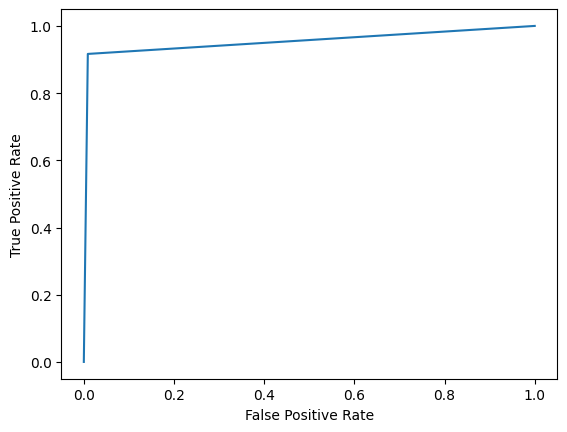

In [29]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, test_result)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print(roc_auc_score(y_test, test_result))
plt.show()

Dari grafik di atas, kita dapat melihat bahwa nilai Area Under the Curve (AUC) mencapai 0.95. Hal ini menunjukkan bahwa model memiliki kinerja yang sangat baik dalam membedakan antara kelas positif dan negatif.

1. **Interpretasi Nilai AUC**:
   - AUC merupakan ukuran yang sangat penting dalam mengevaluasi kinerja model klasifikasi.
   - Nilai AUC berkisar antara 0 hingga 1, di mana nilai yang lebih tinggi menunjukkan kinerja yang lebih baik.
   - AUC = 0.5 menunjukkan klasifikasi acak, sedangkan AUC = 1 menunjukkan klasifikasi sempurna.

2. **Nilai AUC = 0.95**:
   - Dengan nilai AUC sebesar 0.95, model kita memiliki kemampuan yang sangat baik dalam membedakan antara sampel positif dan negatif.
   - Ini menunjukkan bahwa model memiliki tingkat keakuratan yang tinggi dalam memprediksi kelas positif dan negatif.

Dengan nilai AUC sebesar 0.95, model ini telah terbukti mampu memberikan prediksi yang baik dan dapat diandalkan untuk digunakan dalam kasus klasifikasi.

In [30]:
from sklearn.metrics import classification_report


print(classification_report(y_test, test_result))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       452
           1       0.92      0.92      0.92        48

    accuracy                           0.98       500
   macro avg       0.95      0.95      0.95       500
weighted avg       0.98      0.98      0.98       500



Dari classification report ini, kita bisa mendapatkan informasi bahwa model ini sudah bisa memprediksi target variable '0' dengan akurat, dengan precision sebesar 0.99, recall sebesar 0.99, dan F-1 Score sebesar 0.99. Selain itu, model ini juga sudah bisa memprediksi target variable '1' dengan akurat, dengan precision sebesar 0.92, recall sebesar 0.92, dan F-1 Score sebesar 0.92.

Dengan nilai-nilai evaluasi yang tinggi untuk kedua kelas, model ini sudah bisa dibilang baik. Precision dan recall yang tinggi menunjukkan bahwa model memiliki kemampuan untuk memprediksi kedua kelas dengan baik, tanpa terlalu banyak membuat kesalahan. F-1 Score yang tinggi menunjukkan keseimbangan antara precision dan recall.

Selain itu, penting untuk dicatat bahwa model ini tidak mengalami overfitting, yaitu kondisi di mana model terlalu "memorize" data latih dan gagal dalam menggeneralisasi pada data uji. Karena itu, model ini dapat diandalkan untuk digunakan dalam memprediksi data baru.

Dengan demikian, model ini sudah bisa dibilang baik karena sudah mampu memprediksi kedua kelas dengan cukup akurat tanpa mengalami overfitting.